In [2]:
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import TfidfVectorizer

import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


In [3]:
pip install pyLDAvis


    100% |████████████████████████████████| 1.6MB 15.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [4]:
#importing data
from google.colab import drive
from google.colab import files
import os
import io

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive')
os.getcwd()


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


'/content/drive/My Drive'

In [0]:
stop_words = stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use','got','get','include','includ','including','like','go','u','also','liao','still','one','ah','1','2','take','say','think','due','really','need','anyone','well','many','want','go','come','year','make','ah','go','wah','go','good','see','know'])

In [0]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def clean_text(sentences):
    print('Preprocessing Begins...')
    result = []
    for text in sentences:
        text = str(text)
        text = text.lower()
        text = re.sub(r"\'m", " am", text)
        text = re.sub(r"\'s", " is", text)
        text = re.sub(r"\'ll", " will", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"won\'t", "will not", text)
        text = re.sub(r"can\'t", "cannot", text)
        text = re.sub(r"n\'t", " not", text)
        text = re.sub(r"\'bout", "about", text)
        text = re.sub(r"\'til", "until", text)
        text = re.sub(r"""[^a-zA-Z0-9-!$%^&@*()+|=`{}\[\]:;"'<>?,.\/\s]"""," ",text)
        text = re.sub(r"\bft\b|\bforeigntalent\b","foreign talent",text)
        text = re.sub(r"\bgovt\b|\bgahment\b|\bgahmen\b|\bgov\b","government",text)
        text = re.sub(r"\bpappies\b|\bpapies\b|\bpapees\b|\bpap government\b","pap",text)
        text = re.sub(r"\bchi bai\b|\bchibai\b|\bchee bye\b|\bcheebye\b","cb",text)
        text = re.sub(r"\bfk\b|\bfck\b","fuck",text)
        text = re.sub(r"\bkanina\b|\bkanena\b","knn",text)
        text = re.sub(r"\blky\b","lee kuan yew",text)
        text = re.sub(r"\blhl\b|\bpm lee\b","lee hsien loong",text)
        if len(text.split()) == 0:
            continue
        then = []
        sw = stop_words
        for word in text.split():
            if word not in sw:
              word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
              then.append(word)
        result.append(then)
    result = [" ".join(x) for x in result]
    print(result[:3], '\n')
    return result



In [7]:
comments = pd.read_csv("Online Comments.csv")
len(comments)
comments.head(2)

,Unnamed: 0,Comments,Insulting,Anti Government,Xenophobic,Racist,Sexual Content,Name,Done
0,1,FUCK FOREIGN TALENT,1,0,1,0,0,?,Done
1,2,I LOVE THE GOVERNMENT,0,0,0,0,0,?,Done


In [8]:
clean_comments = clean_text(comments["Comments"])
clean_join = pd.Series(clean_comments)
comments["Comments"] = clean_join
comments = comments.dropna()
comments["Comments"][:5]

Preprocessing Begins...
['fuck foreign talent', 'love government', 'woman kitchen'] 



0                                  fuck foreign talent
1                                      love government
2                                        woman kitchen
3    crushed. 3 material time accident happened. ne...
4    first place doctor become defense minister mil...
Name: Comments, dtype: object

In [9]:
preprocessed_comments=[]
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
for i in comments["Comments"]:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # add tokens to list
        preprocessed_comments.append(stopped_tokens)
preprocessed_comments[:5]

[['fuck', 'foreign', 'talent'],
 ['love', 'government'],
 ['woman', 'kitchen'],
 ['crushed',
  '3',
  'material',
  'time',
  'accident',
  'happened',
  'neither',
  'enlighten',
  'need',
  '3',
  'major',
  'surgery',
  '3',
  'days',
  'nothing',
  'new'],
 ['first',
  'place',
  'doctor',
  'become',
  'defense',
  'minister',
  'military',
  'experience',
  'training']]

In [0]:
dictionary = corpora.Dictionary(preprocessed_comments)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in preprocessed_comments]

# for k,v in dictionary.items():
#   print(k,v)
#print(doc_term_matrix[:5])

In [11]:
new_doc_term_matrix=[]
for comment in doc_term_matrix:
  new_words = []
  for word in comment:
    listed_word = list(word)
    new_words.append(listed_word)
    
  new_doc_term_matrix.append(new_words)

    #   comment = [list(i) for i in comment]
  
for comment in new_doc_term_matrix:
  for word in comment:
    word[0] = dictionary[word[0]]
    
new_doc_term_matrix[1:5]

[[['government', 1], ['love', 1]],
 [['kitchen', 1], ['woman', 1]],
 [['3', 3],
  ['accident', 1],
  ['crushed', 1],
  ['days', 1],
  ['enlighten', 1],
  ['happened', 1],
  ['major', 1],
  ['material', 1],
  ['need', 1],
  ['neither', 1],
  ['new', 1],
  ['nothing', 1],
  ['surgery', 1],
  ['time', 1]],
 [['become', 1],
  ['defense', 1],
  ['doctor', 1],
  ['experience', 1],
  ['first', 1],
  ['military', 1],
  ['minister', 1],
  ['place', 1],
  ['training', 1]]]

In [0]:
coherence_values = []
model_list = []
x_range = range(2,92,3)
for num_topics in x_range:
    model=LsiModel(doc_term_matrix,num_topics = num_topics, id2word = dictionary)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model,texts = preprocessed_comments,dictionary = dictionary, coherence = 'c_v')
    coherence_values.append(coherencemodel.get_coherence())


In [13]:
coherence_values

[0.5052362820576282,
 0.4141239829952353,
 0.4045502503216706,
 0.3485985795252337,
 0.35518025883387766,
 0.3656004283258019,
 0.30064901506830255,
 0.3123383390203313,
 0.3174770101196822,
 0.3131373000683299,
 0.33632227695233163,
 0.29276272731095243,
 0.3364479408339057,
 0.3236650728562323,
 0.3031024036318026,
 0.3016800250669225,
 0.3178787458669279,
 0.3053796630587407,
 0.31330339154129044,
 0.3094909975380751,
 0.30088414663136015,
 0.29251122163053345,
 0.32399820363919085,
 0.31870760868801,
 0.2907091614389774,
 0.3019885235652982,
 0.2965558857299341,
 0.30893679342520075,
 0.29823039566249343,
 0.30356697935223825]

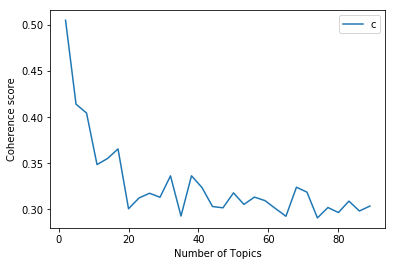

In [14]:
plt.plot(x_range,coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [0]:
coherence_values1 = []
model_list1 = []
x1_range = range(5,20,1)
for num_topics in x1_range:
    model=LsiModel(doc_term_matrix,num_topics = num_topics, id2word = dictionary)
    model_list1.append(model)
    coherencemodel = CoherenceModel(model=model,texts = preprocessed_comments,dictionary = dictionary, coherence = 'c_v')
    coherence_values1.append(coherencemodel.get_coherence())

In [55]:
coherence_values1

[0.3276544530968723,
 0.4257460470165073,
 0.36229494287389963,
 0.33505644803720147,
 0.3397278717033711,
 0.32658355758657415,
 0.3434595663956894,
 0.3136699299449695,
 0.2840921580726901,
 0.33013355872300837,
 0.3797048053337003,
 0.39012347479082043,
 0.2980911045495269,
 0.3106961250564991,
 0.31222485633288644]

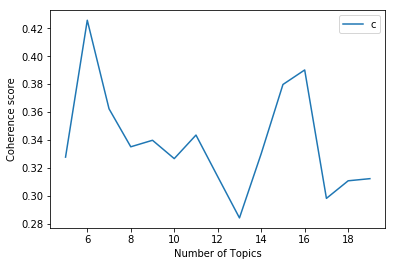

In [56]:
plt.plot(x1_range,coherence_values1)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [0]:
lsamodelfinal = LsiModel(doc_term_matrix,num_topics = 16,id2word = dictionary)

In [58]:
lsamodelfinal.print_topics()

[(0,
  '0.555*"train" + 0.364*"time" + 0.287*"fault" + 0.163*"nsl" + 0.147*"delay" + 0.126*"travel" + 0.113*"look" + 0.111*"go" + 0.095*"knn" + 0.090*"people"'),
 (1,
  '-0.473*"train" + 0.291*"look" + -0.234*"fault" + 0.228*"knn" + 0.155*"go" + -0.140*"nsl" + 0.138*"time" + 0.129*"people" + -0.129*"delay" + 0.120*"even"'),
 (2,
  '0.937*"knn" + -0.195*"time" + 0.084*"train" + 0.075*"cb" + -0.071*"look" + 0.063*"lao" + -0.050*"lol" + -0.044*"even" + 0.042*"wong" + -0.039*"last"'),
 (3,
  '0.730*"time" + -0.564*"look" + -0.191*"train" + 0.118*"knn" + 0.089*"last" + -0.084*"delay" + -0.077*"nsl" + 0.075*"travel" + -0.056*"people" + -0.054*"even"'),
 (4,
  '0.730*"look" + 0.420*"time" + -0.136*"go" + -0.129*"people" + -0.100*"cannot" + -0.100*"day" + -0.098*"ask" + -0.091*"guy" + -0.091*"fap" + -0.089*"even"'),
 (5,
  '0.916*"fap" + 0.377*"pew" + 0.065*"look" + 0.053*"ky" + 0.040*"time" + -0.025*"go" + 0.020*"thread" + -0.019*"people" + -0.018*"even" + -0.018*"day"'),
 (6,
  '0.593*"ah" +